In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv('../data/ready/LINK.csv',index_col='time').drop('Unnamed: 0', axis = 1).dropna()
df.shape

(55, 20)

In [6]:
df['met_threshold'].value_counts(normalize=True)

1.0    0.945455
0.0    0.054545
Name: met_threshold, dtype: float64

In [7]:
target = df['met_threshold']
features = df.drop(['met_threshold','lag_time'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
met_threshold_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

met_threshold_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = met_threshold_model.fit(features_train, target_train, epochs=10, validation_data=(features_test, target_test))

Epoch 1/10
2/2 [==============================] - 1s 144ms/step - loss: 1.0118 - accuracy: 0.0909 - val_loss: 0.9344 - val_accuracy: 0.0909
Epoch 2/10
2/2 [==============================] - 0s 25ms/step - loss: 0.9596 - accuracy: 0.1136 - val_loss: 0.8036 - val_accuracy: 0.1818
Epoch 3/10
2/2 [==============================] - 0s 23ms/step - loss: 0.7398 - accuracy: 0.4091 - val_loss: 0.6967 - val_accuracy: 0.4545
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 0.7102 - accuracy: 0.5455 - val_loss: 0.6037 - val_accuracy: 0.8182
Epoch 5/10
2/2 [==============================] - 0s 24ms/step - loss: 0.6112 - accuracy: 0.7727 - val_loss: 0.5262 - val_accuracy: 0.9091
Epoch 6/10
2/2 [==============================] - 0s 24ms/step - loss: 0.5858 - accuracy: 0.7955 - val_loss: 0.4631 - val_accuracy: 0.9091
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.4713 - accuracy: 0.9545 - val_loss: 0.4130 - val_accuracy: 0.9091
Epoch 8/10
2/2 [==========

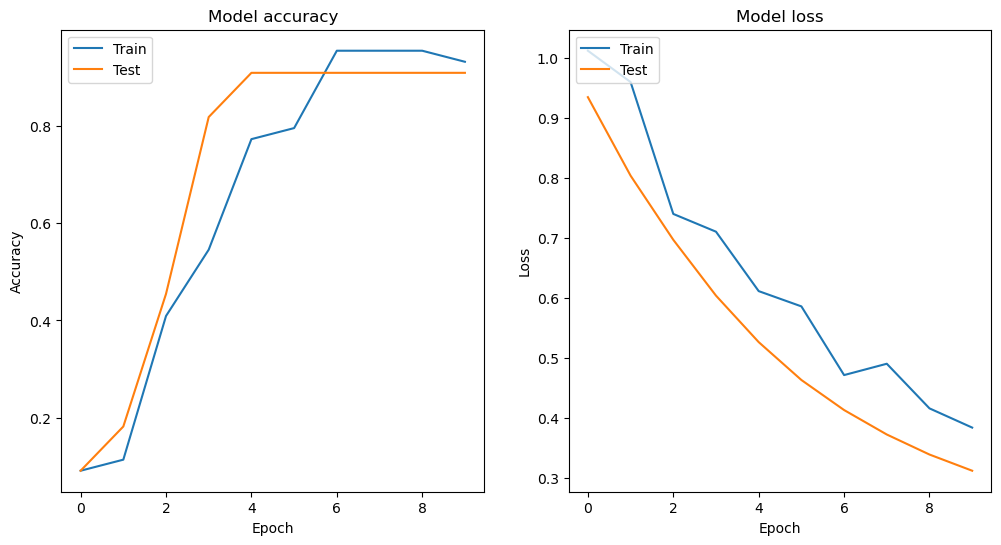

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [10]:
predictions = met_threshold_model.predict(features)
predicted_classes = (predictions >0.5).astype('int32')

2/2 [==============================] - 0s 2ms/step


Accuracy: 94.54545454545455%


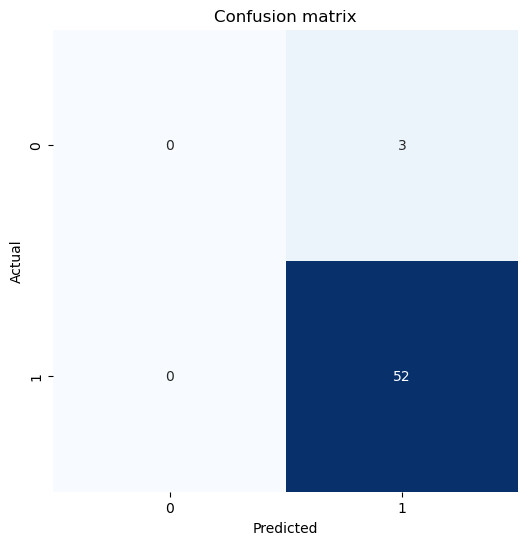

In [11]:
accuracy = accuracy_score(target, predicted_classes)
print(f"Accuracy: {accuracy * 100}%")

cm = confusion_matrix(target, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [12]:
df_predicted = df.copy()
df_predicted['met_threshold'] = predicted_classes
df_predicted['lag_time'] = pd.to_timedelta(df['lag_time']).dt.total_seconds() / 3600

In [13]:
features = df_predicted.drop('lag_time', axis=1)
target = df_predicted['lag_time']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [14]:
lag_model = Sequential([
    Dense(64, activation='relu', input_shape=(features_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

lag_model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lag_model.fit(features_train, target_train, 
                    epochs=100, 
                    validation_data=(features_test, target_test),
                    callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 1s 104ms/step - loss: 10.8951 - val_loss: 8.4909
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 10.0622 - val_loss: 7.5394
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 9.5592 - val_loss: 6.6908
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 8.3422 - val_loss: 5.9451
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 7.9418 - val_loss: 5.3170
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 7.7279 - val_loss: 4.7842
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 6.6344 - val_loss: 4.3113
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 6.5389 - val_loss: 3.8910
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 5.1300 - val_loss: 3.5155
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 5.4082 - val_loss: 3.1872
Epoch 11/100
2/2

1/1 [==============================] - 0s 43ms/step


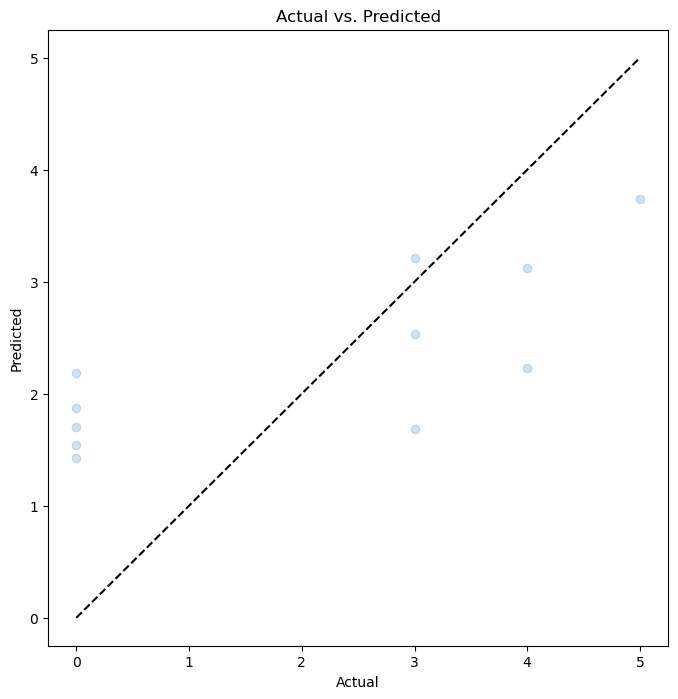

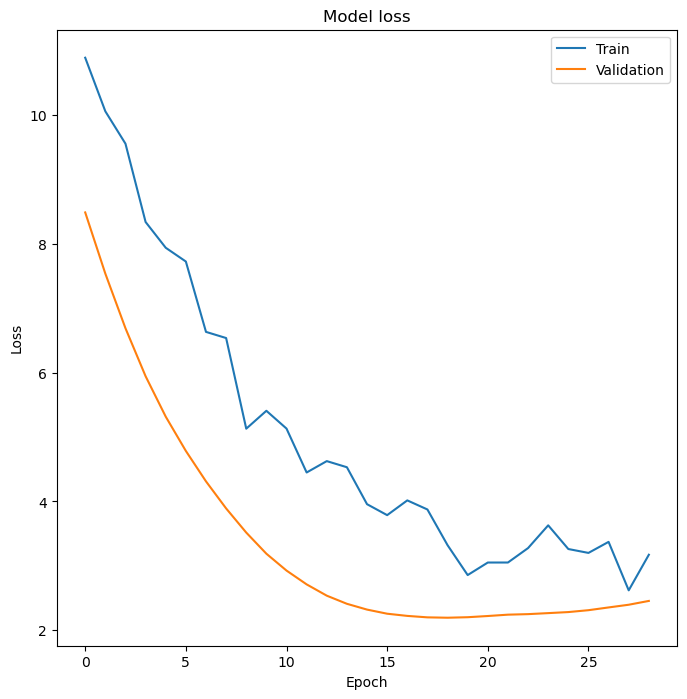

In [15]:
# Make predictions on the test set
predictions_test = lag_model.predict(features_test)

# Create a scatter plot of the actual versus predicted values
plt.figure(figsize=(8, 8))
plt.scatter(target_test, predictions_test, alpha=0.2)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Create a plot of the training and validation loss
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
features_scaled = scaler.transform(features)
predictions_all = lag_model.predict(features_scaled)
df_predicted['lag_time'] = np.around(predictions_all).flatten()
df_predicted.head()

2/2 [==============================] - 0s 2ms/step


,BTC_open,BTC_close,BTC_volume,LINK_open,LINK_close,LINK_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_LINK_change_1hr,perc_LINK_change_2hr,perc_LINK_change_3hr,perc_LINK_change_4hr,perc_LINK_change_5hr,perc_LINK_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2017-11-12 07:00:00,5616.67,6138.88,1.715678e+08,0.1521,0.1674,95719.28,9.296918,5.205359,2.219092,1.160260,-0.743589,-0.903652,10.059172,3.461063,0.359712,1.270417,-1.529412,-3.958692,2.0,1
2017-11-29 21:00:00,9509.08,10194.60,1.320960e+08,0.1400,0.1458,60485.52,7.199302,6.645215,-1.740595,-3.808648,-6.029640,-6.164053,4.142857,0.275103,-5.631068,-7.663078,-8.474576,-9.833024,4.0,1
2017-12-08 14:00:00,15114.61,15870.89,2.090432e+08,0.2282,0.2394,61346.65,5.003636,5.944579,6.429111,5.719737,3.208049,1.424788,5.742049,6.400000,8.227848,3.681247,2.746781,0.377358,2.0,1
2017-12-09 18:00:00,13439.54,14322.63,2.281000e+08,0.2233,0.2317,47015.94,6.544119,0.131713,-2.770597,-4.931755,-5.940056,-3.747125,3.715309,-1.863617,-1.905165,-7.541899,-6.232295,-3.779070,4.0,1
2017-12-10 13:00:00,13952.22,14864.81,1.416254e+08,0.2274,0.2397,41396.04,6.562972,7.371880,7.260159,8.104014,9.961378,8.670265,5.408971,5.270092,5.734451,5.827815,10.511757,9.053685,1.0,1


In [18]:
df_predicted.to_csv('../data/predictions/LINK_predicted.csv')